Thanks for coming to see my notebook!
I am not a fluent English writer, so I apologize if I am difficult to understand!

# Import Library

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter("ignore")

# Data Incorporation

In [2]:
train_df = pd.read_csv("/kaggle/input/playground-series-s3e10/train.csv",index_col="id")
original_df = pd.read_csv("/kaggle/input/pulsar-classification-for-class-prediction/Pulsar.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s3e10/test.csv",index_col="id")

# Data Check
Add 'Flag' to distinguish between the original and the generated dataset.
Next, we check the structure of the data

In [3]:
train_df["flag"] = 1
print(train_df.shape)
train_df.head()

(117564, 10)


,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class,flag
id,,,,,,,,,,
0,133.171875,59.716081,0.043133,-0.703383,54.917224,70.084438,0.749798,-0.649512,0,1
1,87.093750,36.257973,0.435469,2.266057,3.417224,21.865069,7.039330,52.686251,0,1
2,112.640625,39.818393,0.379639,0.922306,2.730769,15.689690,8.193471,85.649785,0,1
3,120.679688,45.918448,-0.098490,0.011775,2.696488,20.954662,8.183874,70.332899,0,1
4,134.070312,57.720107,-0.107772,-0.573335,1.107860,11.255051,16.107748,308.753765,0,1


In [4]:
original_df["flag"] = 0
print(original_df.shape)
original_df.head()

(17898, 10)


,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class,flag
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0,0


In [5]:
test_df["flag"] = 1
print(test_df.shape)
test_df.head()

(78377, 9)


,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,flag
id,,,,,,,,,
117564,140.046875,54.507800,0.058862,-0.567263,2.337793,14.868335,9.591760,117.988781,1
117565,107.828125,51.578965,0.284368,-0.338430,1.574415,12.501437,11.694968,182.704822,1
117566,135.062500,49.812343,-0.087784,-0.094341,3.576923,21.243336,7.252386,59.021499,1
117567,112.812500,41.926647,0.519921,1.287762,6.669732,29.013153,5.097661,27.105240,1
117568,96.210938,35.322620,0.481286,2.443080,2.218227,17.041064,9.766006,117.131775,1



Combine train_df and original_df and Check the data type and null.

In [6]:
train_df = pd.concat([train_df,original_df])
train_df = train_df.reset_index(drop=True)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135462 entries, 0 to 135461
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Mean_Integrated       135462 non-null  float64
 1   SD                    135462 non-null  float64
 2   EK                    135462 non-null  float64
 3   Skewness              135462 non-null  float64
 4   Mean_DMSNR_Curve      135462 non-null  float64
 5   SD_DMSNR_Curve        135462 non-null  float64
 6   EK_DMSNR_Curve        135462 non-null  float64
 7   Skewness_DMSNR_Curve  135462 non-null  float64
 8   Class                 135462 non-null  int64  
 9   flag                  135462 non-null  int64  
dtypes: float64(8), int64(2)
memory usage: 10.3 MB


In [8]:
train_df.isnull().sum()

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
flag                    0
dtype: int64

In [9]:
train_df.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class,flag
count,135462.000000,135462.000000,135462.000000,135462.000000,135462.000000,135462.000000,135462.000000,135462.000000,135462.000000,135462.000000
mean,111.226059,46.691866,0.500110,1.871045,12.048998,26.208626,8.072643,95.331370,0.093059,0.867874
std,25.006347,6.206032,1.118996,6.470713,27.100503,19.967365,3.936322,84.035017,0.290517,0.338629
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000,0.000000
25%,104.033203,43.253382,0.047931,-0.188956,2.072742,14.915976,6.646443,47.649302,0.000000,1.000000
50%,116.503906,47.381724,0.191286,0.099390,2.808528,18.218805,8.441692,83.391792,0.000000,1.000000
75%,126.351562,50.874453,0.406383,0.721346,4.228261,24.988237,10.087258,124.127998,0.000000,1.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000,1.000000


# Variable Meaning
## According to the original dataset, each column has the following meaning.



```
・Mean_Integrated: Mean of Observations

・SD: Standard deviation of Observations

・EK: Excess kurtosis of Observations

・Skewness: In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. Skewness of Observations.

・Mean _ DMSNR _ Curve: Mean of DM SNR CURVE of Observations

・SD _ DMSNR _ Curve: Standard deviation of DM SNR CURVE of Observations

・EK _ DMSNR _ Curve: Excess kurtosis of DM SNR CURVE of Observations

・Skewness _ DMSNR _ Curve: Skewness of DM SNR CURVE of Observations

・Class: Class 0 - 1

WHAT IS DM SNR CURVE:

Radio waves emitted from pulsars reach earth after traveling long distances in space which is filled with free electrons. The important point is that pulsars emit a wide range of frequencies, and the amount by which the electrons slow down the wave depends on the frequency. Waves with higher frequency are sowed down less as compared to waves with higher frequency. It means dispersion.
```


https://www.kaggle.com/datasets/brsdincer/pulsar-classification-for-class-prediction

# Histograms of All Variables
Histograms help you understand the distribution of each piece of data.

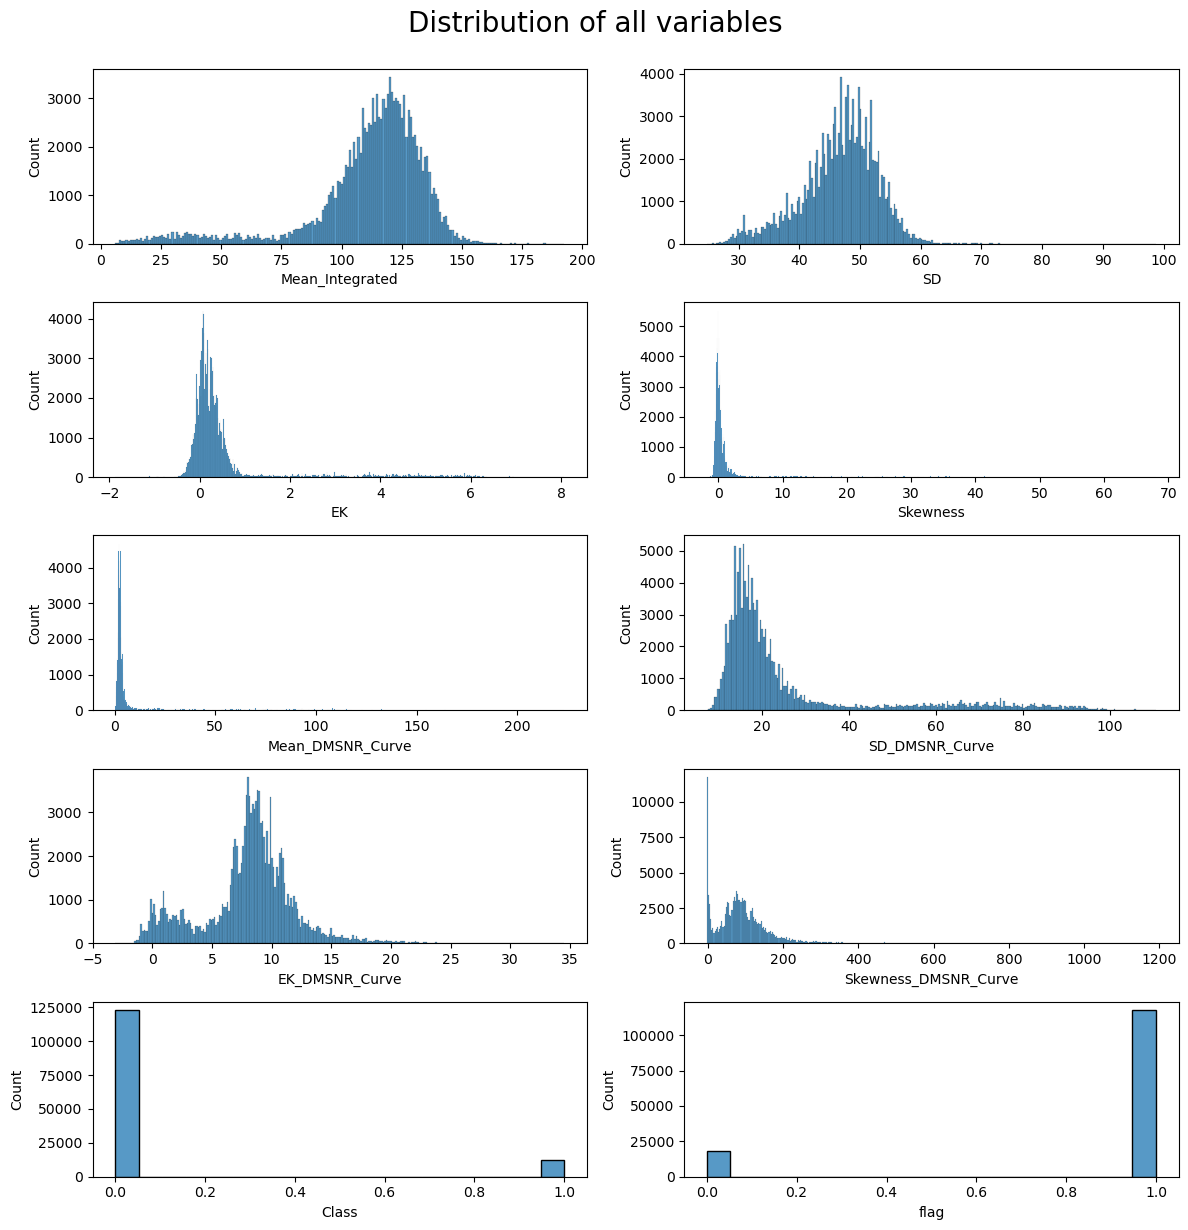

In [10]:
ncols = 2
nrows = np.ceil(len(train_df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(train_df.columns, axs.flatten()):
    sns.histplot(train_df, x=c, ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

# KDE of all variables
## ver.7

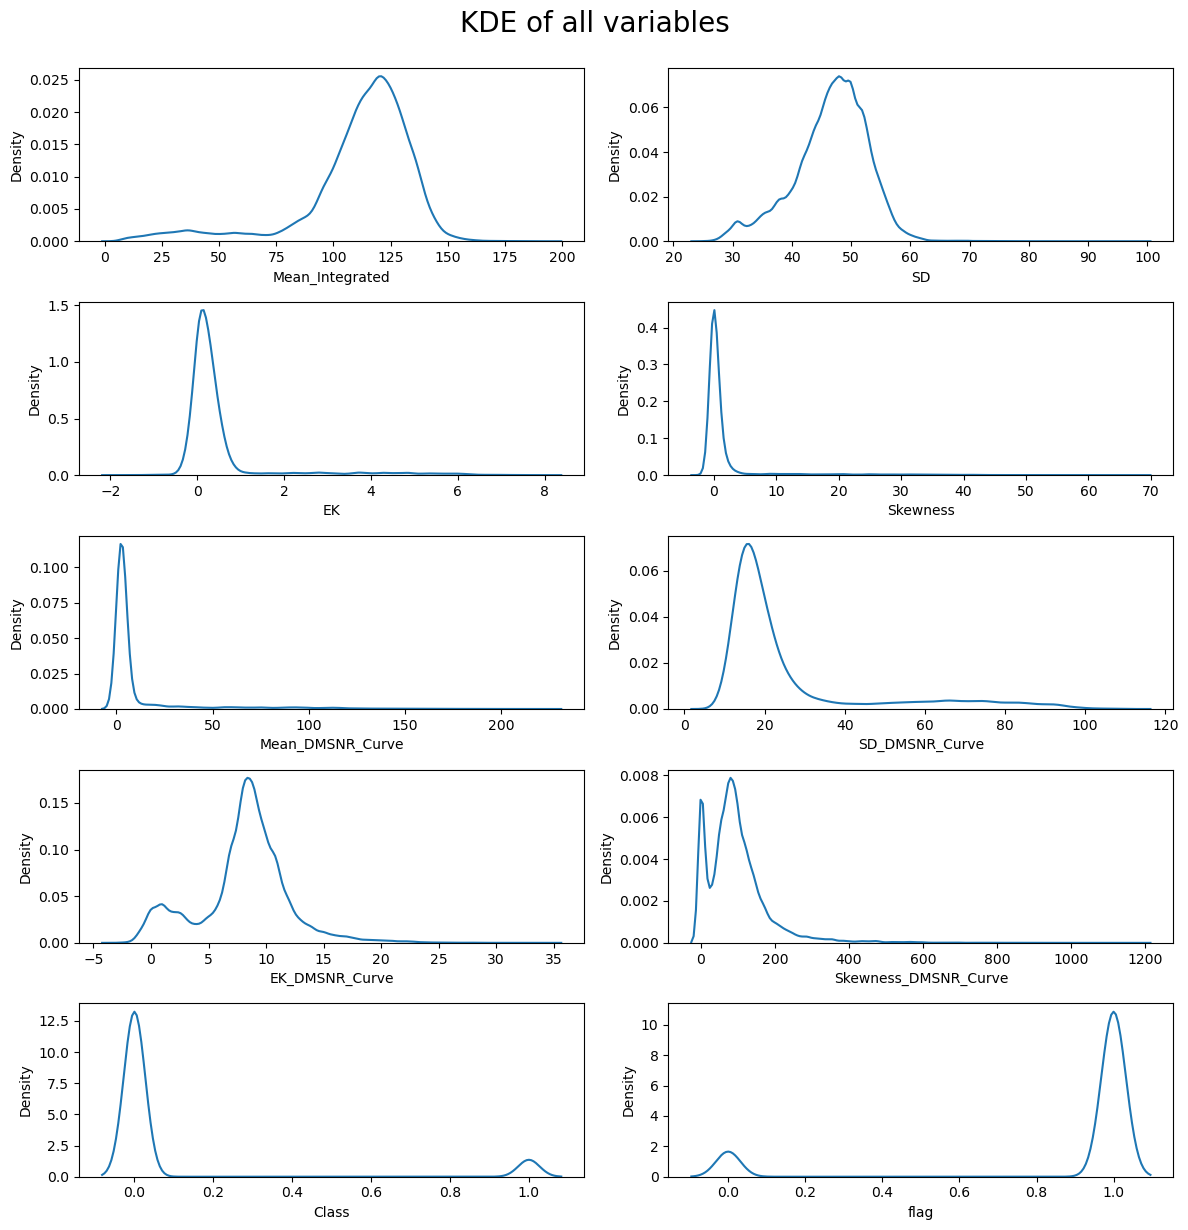

In [11]:
ncols = 2
nrows = np.ceil(len(train_df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(train_df.columns, axs.flatten()):
    sns.kdeplot(train_df[c], ax=ax)
fig.suptitle('KDE of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

## According to [this discussion](https://www.kaggle.com/competitions/playground-series-s3e10/discussion/393093), he estimated the outliers using kde.

In [12]:
outliers = train_df[
    (train_df['Class']==1)&
    (train_df['Mean_Integrated']>115)&
    (train_df['SD']>45)&
    (train_df['EK']<0.03)&
    (train_df['Skewness']<1)&
    (train_df['Mean_DMSNR_Curve']<20)
].index
train_df.drop(outliers,inplace=True)
train_df.reset_index(inplace=True,drop=True)

# Correlation coefficient for TARGET
Using correlation coefficients and heat maps, find variables that are significantly involved in TARGET.

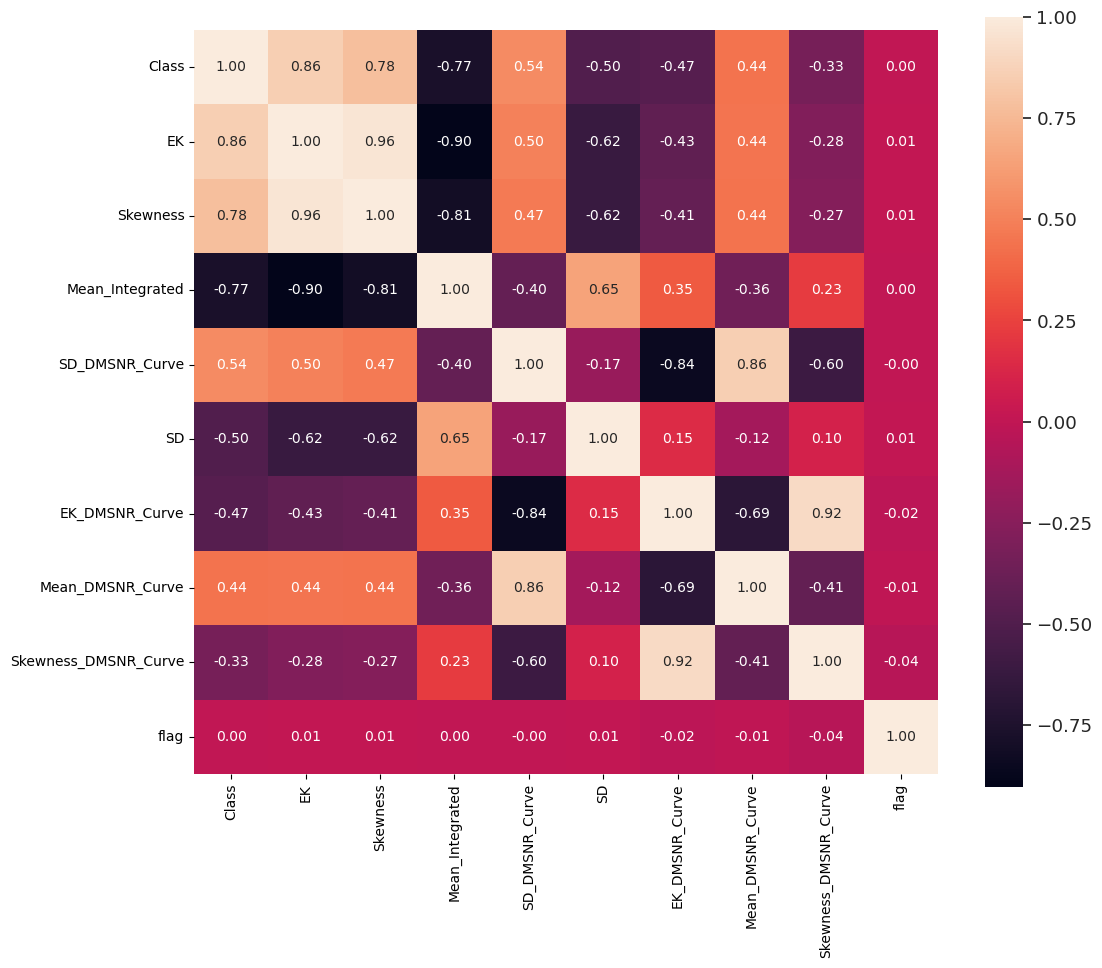

In [13]:
TARGET = "Class"
k = 15 # number of variables for heatmap
corrmat = train_df.corr()
corrmat = np.abs(corrmat)
cols = corrmat.nlargest(k, TARGET)[TARGET].index
cm = np.corrcoef(train_df[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2,font="IPAexGothic")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Let's try machine learning in this state...

## Ver2.The probability was explicitly stated.
## Ver9. Introduce CV to avoid overfitting

In [14]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cat
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import log_loss
import optuna

In [15]:
y = train_df[TARGET]
X = train_df.drop(TARGET,axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=0)
cols = (train_df.drop(TARGET,axis=1)).columns

In [16]:
# XGB
N_split = 2
kf = StratifiedKFold(n_splits=N_split,shuffle=True,random_state=42)

def objective(trial):
   
    params = {
            'n_jobs': -1,
            'n_estimators':2000,
            'objective': 'binary:logistic',
            'early_stopping_rounds': 150,
            'eval_metric': 'logloss',
            'learning_rate':trial.suggest_loguniform('learning_rate', 0.01, 0.2),
            'max_depth': trial.suggest_int('max_depth', 3, 20),
            'reg_alpha': trial.suggest_loguniform('reg_alpha', 1, 10),
            'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-15, 10.0),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
            'tree_method':'gpu_hist'
    }

        
        
    score_list = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_train = X.loc[train_idx][cols]
        X_valid = X.iloc[val_idx][cols]
        
       
        X_train_f = X_train
        y_train = y.loc[train_idx].values

        X_valid_f = X_valid
        y_valid = y.loc[val_idx].values


        model = xgb.XGBClassifier(**params)
        model.fit(X_train,
                      y_train,
                      eval_set=[(X_valid, y_valid)],
                      verbose=0)

        y_valid_pred = model.predict(X_valid_f)
        score = log_loss(y_valid, y_valid_pred)
        score_list.append(score)
    return sum(score_list) / len(score_list)

xgb_study = optuna.create_study(direction='minimize')
xgb_study.optimize(objective, n_trials=50)
print(xgb_study.best_params)


xgb_params = xgb_study.best_params
add_params = {
          'n_jobs': -1,
          'n_estimators':20000,
          'objective': 'binary:logistic',
          'early_stopping_rounds': 150,
          'eval_metric': 'logloss',
          'tree_method':'gpu_hist'
         }
xgb_params.update(add_params)

models_xgb = []
valid_scores = []

cv = StratifiedKFold(n_splits=15,shuffle=True,random_state=42)
for fold, (fit_idx, val_idx) in enumerate(cv.split(X, y)):
    X_train = X.iloc[fit_idx]
    X_valid = X.iloc[val_idx]
    y_train = y.iloc[fit_idx]
    y_valid = y.iloc[val_idx]
    
    model_xgb = xgb.XGBClassifier(**xgb_params)
    model_xgb.fit(X_train,
                  y_train,
                  eval_set=[(X_train, y_train),(X_valid, y_valid)],
                  verbose=0)
    
    valid_preds = model_xgb.predict(X_valid)
    valid_score = log_loss(y_valid, valid_preds)
    valid_scores.append(valid_score) 
    print(valid_score)
    
    models_xgb.append(model_xgb)
print(f"mean:{sum(valid_scores)/len(valid_scores)}")

[I 2023-03-12 05:37:36,255] A new study created in memory with name: no-name-a1fdb35e-5c9a-42a6-9405-a4491315c9ba
[I 2023-03-12 05:37:42,899] Trial 0 finished with value: 0.372275754117775 and parameters: {'learning_rate': 0.01737347894926197, 'max_depth': 14, 'reg_alpha': 2.125989631508604, 'reg_lambda': 3.569749545181687e-07, 'min_child_weight': 79}. Best is trial 0 with value: 0.372275754117775.
[I 2023-03-12 05:37:45,164] Trial 1 finished with value: 0.4003240810939401 and parameters: {'learning_rate': 0.034560569984902006, 'max_depth': 17, 'reg_alpha': 1.0631089184526745, 'reg_lambda': 0.06718587074484085, 'min_child_weight': 222}. Best is trial 0 with value: 0.372275754117775.
[I 2023-03-12 05:37:51,641] Trial 2 finished with value: 0.3710008465317356 and parameters: {'learning_rate': 0.023968413997859758, 'max_depth': 18, 'reg_alpha': 4.326809732218265, 'reg_lambda': 1.5814089607225128, 'min_child_weight': 80}. Best is trial 2 with value: 0.3710008465317356.
[I 2023-03-12 05:37:

{'learning_rate': 0.012961521701299255, 'max_depth': 14, 'reg_alpha': 8.009227889411733, 'reg_lambda': 0.0027544784677795663, 'min_child_weight': 32}
0.40157159900301687
0.3021355911331445
0.2753636907958191
0.37862540686621554
0.39392345855202043
0.3289063404609923
0.36336679382695664
0.34041744074063723
0.38249276006514776
0.3595427871358593
0.39014227878026747
0.3212935996783402
0.3327680105745131
0.3480676678477216
0.37484244440906783
mean:0.35289732465798135


In [17]:
# lgb
N_split = 2
kf = StratifiedKFold(n_splits=N_split,shuffle=True,random_state=42)
def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'early_stopping_round': 150,
        'task': 'train', 
        'seed':42,
        'n_estimators':2000,
        'device':'gpu',
        'learning_rate': trial.suggest_float("learning_rate", 0.04,0.4),
        'num_leaves': trial.suggest_int('num_leaves', 10, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 3, 2000),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),

    }
            

    score_list = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_train = X.loc[train_idx][cols]
        X_valid = X.iloc[val_idx][cols]
        
       
        X_train_f = X_train
        y_train = y.loc[train_idx].values

        X_valid_f = X_valid
        y_valid = y.loc[val_idx].values


        model = lgb.LGBMClassifier(**params)
        model.fit(X_train,
                      y_train,
                      eval_set=[(X_valid, y_valid)],
                      verbose=0)

        y_valid_pred = model.predict(X_valid_f)
        score = log_loss(y_valid, y_valid_pred)
        score_list.append(score)
        
    return sum(score_list) / len(score_list)

lgb_study = optuna.create_study(direction='minimize')
lgb_study.optimize(objective, n_trials=50)
print(lgb_study.best_params)

lgb_params = lgb_study.best_params
add_params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'early_stopping_round': 150,
        'task': 'train', 
        'seed':42,
        'n_estimators':20000,
        'device':'gpu'
        
}
lgb_params.update(add_params)

models_lgb = []
valid_scores = []

cv = StratifiedKFold(n_splits=15,shuffle=True,random_state=42)
for fold, (fit_idx, val_idx) in enumerate(cv.split(X, y)):
    X_train = X.iloc[fit_idx]
    X_valid = X.iloc[val_idx]
    y_train = y.iloc[fit_idx]
    y_valid = y.iloc[val_idx]
    
    model_lgb = lgb.LGBMClassifier(**lgb_params)
    model_lgb.fit(X_train,
                  y_train,
                  eval_set=[(X_train, y_train),(X_valid, y_valid)],
                  verbose=0)
    
    valid_preds = model_lgb.predict(X_valid)
    valid_score = log_loss(y_valid, valid_preds)
    valid_scores.append(valid_score) 
    print(valid_score)
    
    models_lgb.append(model_lgb)
print(f"mean:{sum(valid_scores)/len(valid_scores)}")

[I 2023-03-12 05:46:02,279] A new study created in memory with name: no-name-c9d707c2-2210-43c5-a332-72c7f5ae961a
[I 2023-03-12 05:46:12,583] Trial 0 finished with value: 0.353662038428546 and parameters: {'learning_rate': 0.20048705982697895, 'num_leaves': 339, 'max_depth': 7, 'min_child_samples': 1208, 'reg_alpha': 0.0004723437028526884, 'reg_lambda': 0.013242039663311979}. Best is trial 0 with value: 0.353662038428546.
[I 2023-03-12 05:46:22,181] Trial 1 finished with value: 0.36360637662970213 and parameters: {'learning_rate': 0.36934174255183005, 'num_leaves': 863, 'max_depth': 91, 'min_child_samples': 446, 'reg_alpha': 3.372737121967309e-05, 'reg_lambda': 2.076735640614834e-07}. Best is trial 0 with value: 0.353662038428546.
[I 2023-03-12 05:46:33,232] Trial 2 finished with value: 0.3579967360270897 and parameters: {'learning_rate': 0.04469967350900254, 'num_leaves': 502, 'max_depth': 81, 'min_child_samples': 1998, 'reg_alpha': 0.00020081084742712814, 'reg_lambda': 0.005712218842

{'learning_rate': 0.20048705982697895, 'num_leaves': 339, 'max_depth': 7, 'min_child_samples': 1208, 'reg_alpha': 0.0004723437028526884, 'reg_lambda': 0.013242039663311979}
0.38627372439559327
0.3136091741670934
0.2944862111334798
0.36332726664122017
0.39009872428259273
0.3212575802356617
0.3518921172837969
0.3251178720164243
0.382492494418161
0.37484288715404573
0.3939671709613207
0.3557181606017928
0.3595422558418857
0.3365928142065707
0.37101746367901894
mean:0.35468239446791056


In [18]:
## cat
N_split = 2
kf = StratifiedKFold(n_splits=N_split,shuffle=True,random_state=42)

import optuna

def objective(trial):
    params = {
                'custom_loss' :['Logloss'],
                'iterations':2000,
                'use_best_model': True,
                'random_seed' : 1,
                'learning_rate' :trial.suggest_loguniform('learning_rate', 0.01, 0.3),
                "depth": trial.suggest_int("depth", 1, 15),
                'l2_leaf_reg' :trial.suggest_loguniform('l2_leaf_reg', 1e-8, 20),
                'random_strength' : trial.suggest_loguniform('random_strength', 1, 50),
                'min_data_in_leaf':trial.suggest_int('min_data_in_leaf', 1, 100),
                'task_type':"GPU",
                'devices':'0:1'
            }

    score_list = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        X_train = X.loc[train_idx][cols]
        X_valid = X.iloc[val_idx][cols]
        
       
        X_train_f = X_train
        y_train = y.loc[train_idx].values

        X_valid_f = X_valid
        y_valid = y.loc[val_idx].values


        model = cat.CatBoostClassifier(**params,)
        model.fit(X_train,
                      y_train,
                      eval_set=[(X_valid, y_valid)],
                      verbose=0,
                      early_stopping_rounds=150,
                      use_best_model=True)

        y_valid_pred = model.predict(X_valid_f)
        score = log_loss(y_valid, y_valid_pred)
        score_list.append(score)
        
    return sum(score_list) / len(score_list)

cb_study = optuna.create_study(direction='minimize')
cb_study.optimize(objective, n_trials=50)
print(cb_study.best_params)


cb_params = cb_study.best_params
add_params = {
        'custom_loss' :['Logloss'],
        'iterations':20000,
        'task_type':"GPU",
        'devices':'0:1'
}
cb_params.update(add_params)

models_cb = []
valid_scores = []

cv = StratifiedKFold(n_splits=15,shuffle=True,random_state=42)
for fold, (fit_idx, val_idx) in enumerate(cv.split(X, y)):
    X_train = X.iloc[fit_idx]
    X_valid = X.iloc[val_idx]
    y_train = y.iloc[fit_idx]
    y_valid = y.iloc[val_idx]
    
    model_cb = cat.CatBoostClassifier(**cb_params,)
    model_cb.fit(X_train,
                  y_train,
                  eval_set=[(X_valid, y_valid)],
                  verbose=1000,
                  early_stopping_rounds=150,
                  use_best_model=True)
    
    valid_preds = model_cb.predict(X_valid)
    valid_score = log_loss(y_valid, valid_preds)
    valid_scores.append(valid_score) 
    print(valid_score)
    
    models_cb.append(model_cb)
print(f"mean:{sum(valid_scores)/len(valid_scores)}")

[I 2023-03-12 05:52:26,692] A new study created in memory with name: no-name-bfa4587f-ddd1-4a8b-94e9-35f2aea4a93a
[I 2023-03-12 05:53:57,200] Trial 0 finished with value: 0.3653912059291231 and parameters: {'learning_rate': 0.03791838786247043, 'depth': 10, 'l2_leaf_reg': 3.915054623677944e-06, 'random_strength': 24.414306494651953, 'min_data_in_leaf': 39}. Best is trial 0 with value: 0.3653912059291231.
[I 2023-03-12 05:54:34,679] Trial 1 finished with value: 0.3587616569666937 and parameters: {'learning_rate': 0.01331091168071915, 'depth': 10, 'l2_leaf_reg': 0.1218808081393978, 'random_strength': 27.155619047856163, 'min_data_in_leaf': 92}. Best is trial 1 with value: 0.3587616569666937.
[I 2023-03-12 05:55:31,909] Trial 2 finished with value: 0.3636063175996533 and parameters: {'learning_rate': 0.03118580275872924, 'depth': 14, 'l2_leaf_reg': 0.0005051066017215481, 'random_strength': 25.75872744872252, 'min_data_in_leaf': 61}. Best is trial 1 with value: 0.3587616569666937.
[I 2023-

{'learning_rate': 0.016942458402583717, 'depth': 5, 'l2_leaf_reg': 2.111288353488226, 'random_strength': 31.65660400617321, 'min_data_in_leaf': 21}
0:	learn: 0.6457956	test: 0.6459497	best: 0.6459497 (0)	total: 9ms	remaining: 2m 59s
1000:	learn: 0.0336020	test: 0.0396406	best: 0.0396406 (1000)	total: 7.94s	remaining: 2m 30s
2000:	learn: 0.0307050	test: 0.0387858	best: 0.0387609 (1960)	total: 17.3s	remaining: 2m 35s
bestTest = 0.03852210807
bestIteration = 2631
Shrink model to first 2632 iterations.
0.39009828158663973
0:	learn: 0.6485877	test: 0.6486129	best: 0.6486129 (0)	total: 9.04ms	remaining: 3m
1000:	learn: 0.0342233	test: 0.0323391	best: 0.0323387 (998)	total: 8.28s	remaining: 2m 37s
2000:	learn: 0.0312409	test: 0.0314027	best: 0.0314005 (1998)	total: 16.6s	remaining: 2m 29s
3000:	learn: 0.0291342	test: 0.0310532	best: 0.0310532 (3000)	total: 26.2s	remaining: 2m 28s
bestTest = 0.03095219764
bestIteration = 3559
Shrink model to first 3560 iterations.
0.31743381989733055
0:	learn:

## Create a submission file

In [19]:
def predict(test_df,models):
    y = np.zeros(len(test_df))
    for model in models:
        y += model.predict_proba(test_df)[:,1]
    return y / len(models)

def predict_cb(test_df,models):
    y = np.zeros(len(test_df))
    for model in models:
        y += model.predict(test_df,prediction_type='Probability')[:,1]
    return y / len(models)

def norm(preds):
    return (preds - np.min(preds)) / (np.max(preds) - np.min(preds))


sub = pd.read_csv("/kaggle/input/playground-series-s3e10/sample_submission.csv")
sub[TARGET] = norm(predict(test_df,models_xgb))
sub.to_csv("/kaggle/working/xgbproba.csv",index=False)
sub[TARGET] = norm(predict(test_df,models_lgb))
sub.to_csv("/kaggle/working/lgbproba.csv",index=False)
sub[TARGET] = norm(predict_cb(test_df,models_cb))
sub.to_csv("/kaggle/working/cbproba.csv",index=False)

In [20]:
sub[TARGET] = (norm(predict(test_df,models_xgb)) + norm(predict(test_df,models_lgb)) + norm(predict_cb(test_df,models_cb)))/3
sub.to_csv("/kaggle/working/mix3.csv",index=False)

sub[TARGET] = (norm(predict(test_df,models_xgb)) + norm(predict_cb(test_df,models_cb)))/2
sub.to_csv("/kaggle/working/mix2.csv",index=False)

# Result
## Ver8. Oops, xgb and lgb were not probability distributed!

### xgb Score:0.03239
### lgb Score:0.3307
### cb Score:0.03234

### mix3 Score:0.03221

### mix2 Score:0.03212